In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv('advertising.csv')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Objective
create a predictive model, that predicts sales based on the money spent on different platforms for marketing.

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.shape

(200, 4)

In [8]:
import seaborn as sns

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


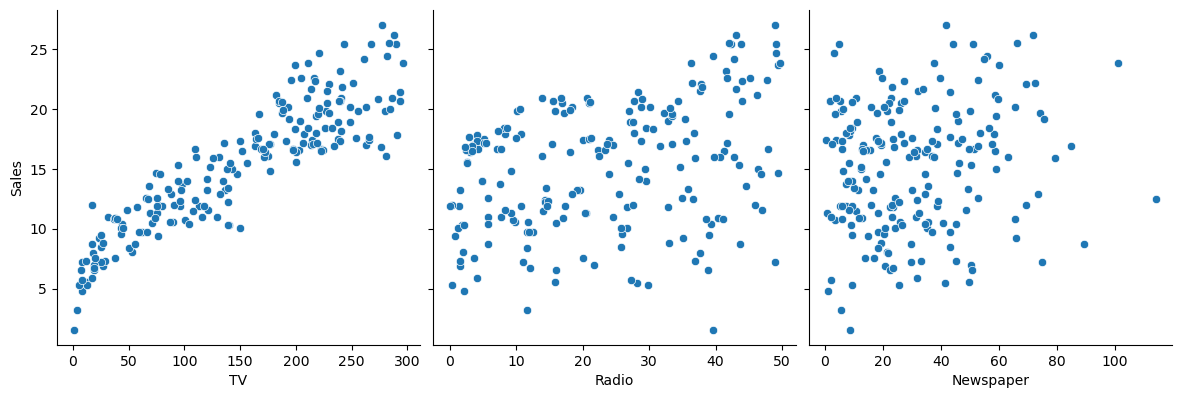

In [14]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, kind='scatter')
plt.show();

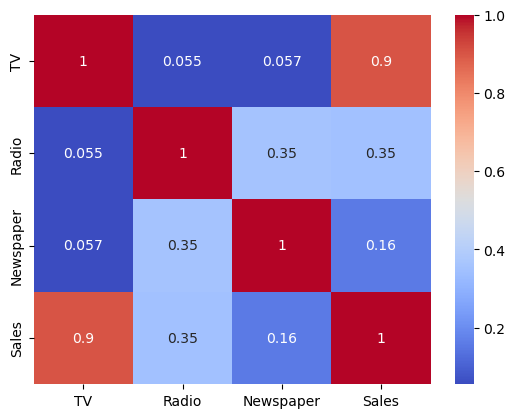

In [19]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show();

### Splitting the data

In [20]:
X = df['TV']
y = df['Sales']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160,), (160,), (40,), (40,))

## Performing Linear Regression

In [25]:
import statsmodels.api as sm

In [26]:
# Why use add_constant: By default, the statsmodels library fits a line on the dataset which passes through the origin. 
# But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels.
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [29]:
# Print the parameters,i.e. intercept and slope of the regression line obtained
# const -> intercept
# TV -> slope
lr.params

const    7.007108
TV       0.055483
dtype: float64

In [30]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.71e-59
Time:                        22:33:54   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.000       6.289       7.725
TV             0.0555      0.002     26.251      0.000       0.051       0.060
==============================================================================
Omnibus:                        0.631   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.767
Skew:                          -0.110   Prob(JB):                        0.681
Kurtosis:                       2.742   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predict with test data

In [31]:
X_test_sm = sm.add_constant(X_test)

In [34]:
y_pred = lr.predict(X_test_sm)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2score = r2_score(y_test, y_pred)

In [36]:
print(f'Root mean squared error: {rmse} and R2 score: {r2score}')

Root mean squared error: 2.470035001123256 and R2 score: 0.8025613034236981


## Using LinearRegression from sklearn

In [41]:
# we need to add an additional column in order for the linear regression fit to be performed successfully.

X_train_lm = X_train.values.reshape(-1, 1)
X_test_lm = X_test.values.reshape(-1, 1)

In [42]:
X_train_lm.shape

(160, 1)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
linReg = LinearRegression()

In [46]:
linReg.fit(X_train_lm, y_train)

LinearRegression()

In [54]:
# Getting Intercept and Slope
pd.DataFrame([linReg.intercept_, linReg.coef_[0]], index=['Intercept', 'Slope'])

,0
Intercept,7.007108
Slope,0.055483


In [56]:
y_pred_reg = linReg.predict(X_test_lm)

In [57]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
r2score = r2_score(y_test, y_pred_reg)

In [58]:
print(f'Root mean squared error: {rmse} and R2 score: {r2score}')

Root mean squared error: 2.470035001123256 and R2 score: 0.802561303423698


## Additional testing

In [62]:
linReg.predict(np.array(44).reshape(-1, 1))

array([9.44835796])

In [64]:
sns.scatter?

Object `sns.scatter` not found.


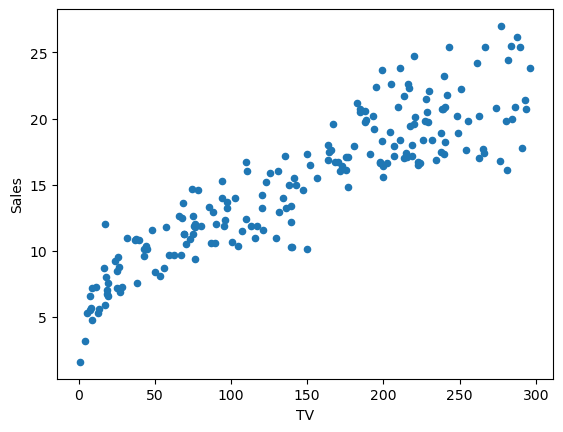

In [84]:
df[['TV', 'Sales']].plot.scatter(x='TV', y='Sales')
plt.show();

In [82]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    df[['TV', 'Sales']].plot.scatter(x='TV', y='Sales')
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color='red')
    plt.show();

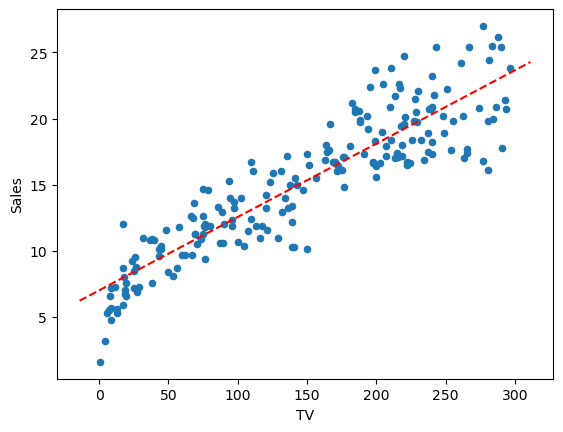

In [83]:
abline(linReg.coef_, linReg.intercept_)